In [1]:
#Dependencies

import math
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [59]:
#Ticker + Data

ticker = '2354.TW' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='1998-1-1')['Adj Close']

In [60]:
#Deltas

log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,2354.TW
Date,
2018-11-06,0.001507
2018-11-07,0.007502
2018-11-08,-0.004494
2018-11-09,0.008969
2018-11-12,-0.045670


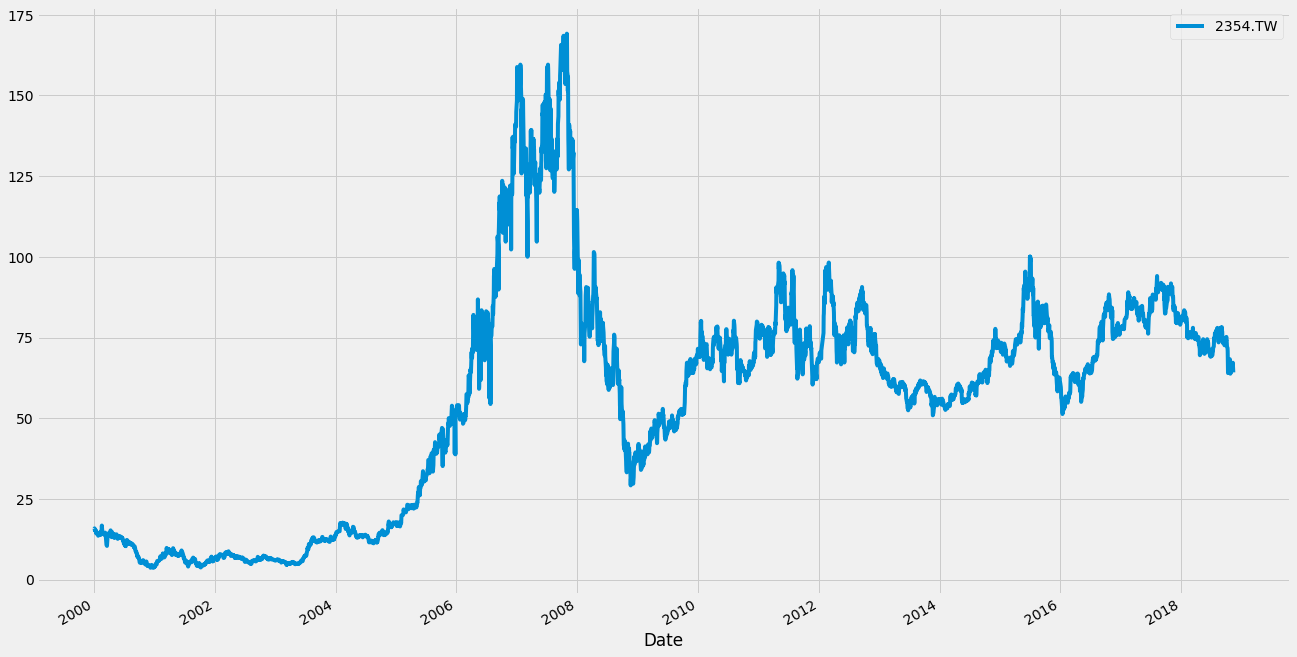

In [61]:
data.plot(figsize=(20, 12));

In [62]:
#Delta_Mean

mu = log_returns.mean()
print(mu)

2354.TW    0.000296
dtype: float64


In [63]:
#Delta_Variance

stdsquare = log_returns.var()
print(stdsquare)

2354.TW    0.001023
dtype: float64


In [64]:
#Drift

drift = mu - (0.5 * stdsquare)
print(drift)

2354.TW   -0.000215
dtype: float64


In [65]:
#Delta_Standard Deviation

std = log_returns.std()
print(std)

2354.TW    0.03198
dtype: float64


In [66]:
np.array(drift)

array([-0.00021489])

In [67]:
drift.values

array([-0.00021489])

In [68]:
std.values

array([0.03197983])

In [69]:
z = norm.ppf(0.95)
print(z)

1.6448536269514722


In [70]:
#Randomization wrt a 10x2 matrix

r = np.random.rand(10, 2)
r

array([[0.21296799, 0.97086199],
       [0.9458904 , 0.14713632],
       [0.52469194, 0.62325951],
       [0.0979276 , 0.57631892],
       [0.67087326, 0.01276738],
       [0.23650185, 0.0829432 ],
       [0.69424766, 0.0704526 ],
       [0.73401003, 0.88667813],
       [0.79328844, 0.13292013],
       [0.44944249, 0.11040691]])

In [71]:
#Converting the Randomization to in terms of Z score

norm.ppf(r)

array([[-0.79616528,  1.89361589],
       [ 1.60624903, -1.04879467],
       [ 0.06193308,  0.31405274],
       [-1.2934508 ,  0.19248521],
       [ 0.44232578, -2.23321508],
       [-0.71760041, -1.38554332],
       [ 0.50792679, -1.47242849],
       [ 0.62498645,  1.20904974],
       [ 0.81788455, -1.1126931 ],
       [-0.12707001, -1.22436697]])

In [72]:
#Our final Z conversion

Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.47275363,  0.72405678],
       [ 0.09776084, -0.22905495],
       [ 0.8120731 , -1.44130312],
       [-0.50119191,  0.816593  ],
       [-0.56946819, -0.99416927],
       [-2.11361498, -0.71968603],
       [-1.31062746,  0.44803728],
       [ 1.35593895,  0.81615915],
       [-0.51617847,  1.05189354],
       [-0.62398929,  0.0140295 ]])

In [114]:
#Predicting the next thousand days and creating 10 timelines.

days = 1000
timelines = 10000

In [115]:
#Our Daily Returns: Creating a 1000x10 array.

daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(days, timelines)))
print(daily_returns)

[[1.00505856 1.00437152 1.0115588  ... 1.0088016  1.03674192 0.9496311 ]
 [1.00518635 0.98464282 1.03596871 ... 0.986561   0.99382195 0.96810078]
 [0.97377372 0.91295639 1.04680663 ... 1.02179264 0.99468944 0.93459593]
 ...
 [0.95461543 0.99801443 0.98574688 ... 0.97206813 0.98925717 1.00320422]
 [1.0499002  1.0197787  1.0350568  ... 1.02390027 0.95258381 1.01250404]
 [1.04297136 0.97041659 0.96082623 ... 1.02652695 0.99944329 1.00336724]]


In [116]:
#The first stock price in our list i.e. the last in our data set; this is since we start from the current date not from the last.

S_0 = data.iloc[-1]
print(S_0)

2354.TW    64.199997
Name: 2018-11-12 00:00:00, dtype: float64


In [117]:
#The list of prices
#zeros_like creates an array of the same dimensions as an existing array full of zeros.

list_of_prices = np.zeros_like(daily_returns)
print(list_of_prices)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [118]:
list_of_prices[0] = S_0
list_of_prices

array([[64.19999695, 64.19999695, 64.19999695, ..., 64.19999695,
        64.19999695, 64.19999695],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [119]:
for i in range(1, days):
    list_of_prices[i] = list_of_prices[i - 1] * daily_returns[i]

In [120]:
list_of_prices

array([[ 64.19999695,  64.19999695,  64.19999695, ...,  64.19999695,
         64.19999695,  64.19999695],
       [ 64.53296067,  63.21406584,  66.50918807, ...,  63.3372129 ,
         63.80336637,  62.15206706],
       [ 62.84050106,  57.71168515,  69.62225934, ...,  64.71749828,
         63.46453505,  58.08706903],
       ...,
       [ 19.54370392,  22.29714027, 708.17323247, ...,   3.53491376,
        206.19871021,  13.17125796],
       [ 20.51893856,  22.73814866, 732.99951692, ...,   3.61939916,
        196.42155313,  13.33595194],
       [ 21.40066535,  22.06547667, 704.2851611 , ...,   3.71541078,
        196.31220391,  13.38085734]])

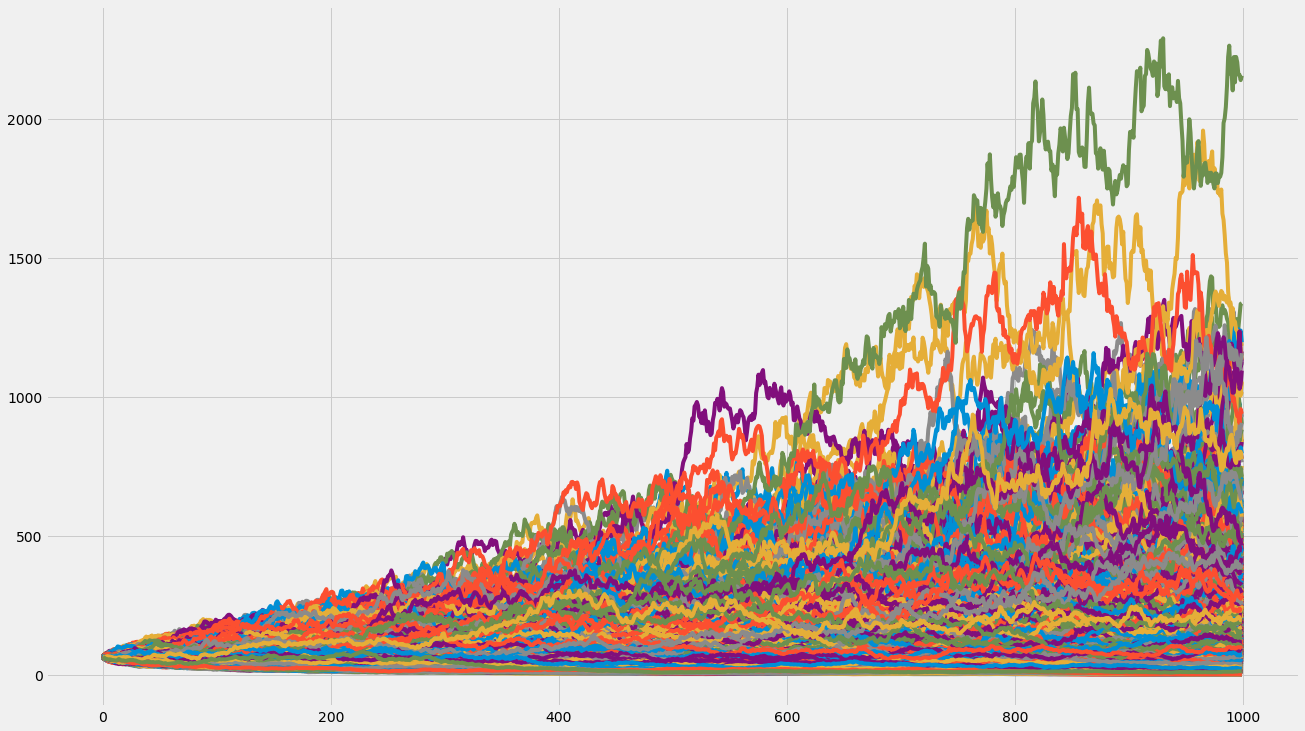

In [121]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,12))
plt.plot(list_of_prices)
plt.savefig("Figures/10000_Timelines.png")
plt.show()